In [1]:
# For ignoring future warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline
sns.set()

Importing data into pandas dataframe from csv file

In [2]:
df = pd.read_csv("HR_dataset.csv")

Doing data exploration

In [3]:
df.sample(10)

,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left_company,promotion_last_5years,role,salary
13813,Ray Lowman,0.59,0.50,2,162,2,0,0,0,management,high
8959,Lester Shady,0.32,0.67,5,224,4,1,0,0,accounting,medium
10730,Peter Murray,0.74,0.83,4,210,3,0,0,0,support,low
10197,Donna Penrod,0.50,0.40,2,108,2,0,0,0,technical,medium
6808,Pamela Kraft,0.72,0.99,4,156,2,1,0,0,sales,low
6652,Matthew Cantrell,0.13,0.88,3,146,5,0,0,0,sales,low
5216,Robert Colston,0.45,0.64,5,133,4,0,0,0,accounting,medium
10621,Karen Ruthledge,0.41,0.68,3,191,4,0,0,0,sales,medium
14823,Lou Garnett,0.37,0.47,2,138,3,1,1,0,accounting,medium
2326,Larry Strissel,0.56,0.66,3,212,2,0,0,0,technical,medium


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left_company,promotion_last_5years
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.612847,0.716115,3.803133,201.052400,3.498333,0.144600,0.238133,0.021267
std,0.248628,0.171171,1.232590,49.942074,1.460139,0.351709,0.425955,0.144277
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


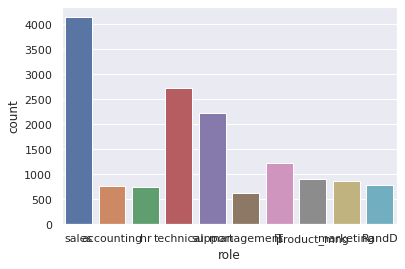

In [5]:
ax = sns.countplot(df['role'])

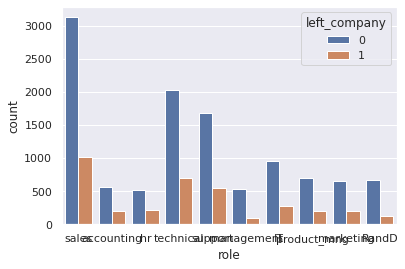

In [6]:
ax = sns.countplot(x="role", hue= "left_company", data=df)

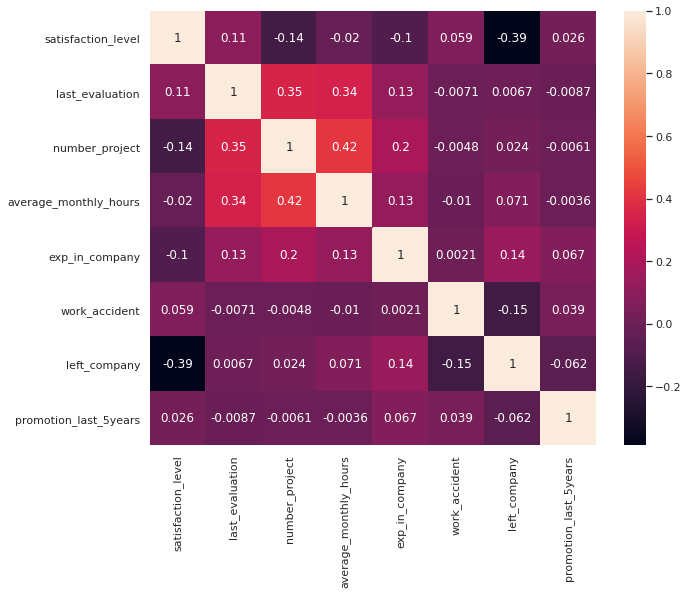

In [7]:
corr = df.corr()
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr, annot=True)

**Observation**


1.  Maximum number of years in the company is 10 years and 75% of the employees are working 4 years or below in this company.
2.   Sales department has highest number of employees and highest turn over
3.   Attrition  rate of this company is 23%

* the dataset does not require data cleaning


For this prediction I am going to use KNN model and using the "Elbow Method" to find optimal K

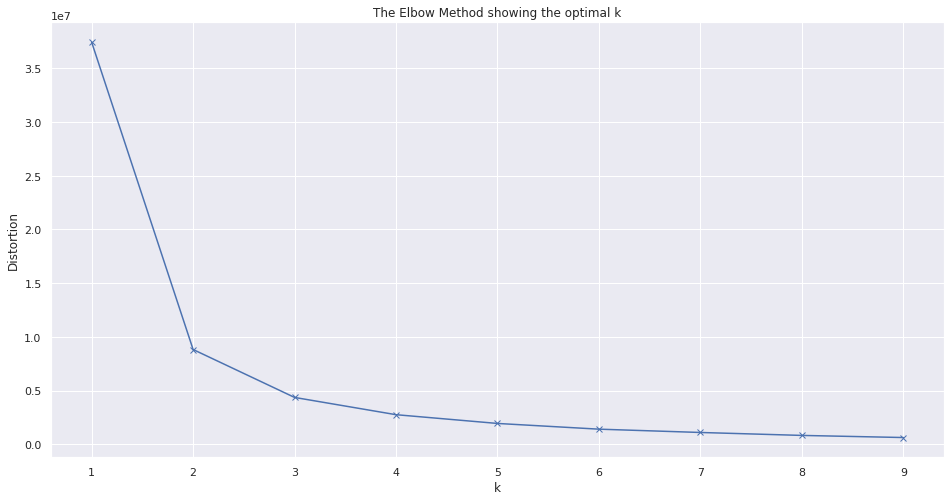

In [8]:
inputs = ['satisfaction_level','number_project', 'average_monthly_hours']

#Identify the optimal no. of k using the elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[inputs])
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow method show optimal K value is 3

Using Sastifation Level, number of projects and average monthly hours as imput to predict if the employee will leave the company

In [9]:
X = df[inputs]
y = df['left_company']

Splitting data for training(70%) and testing(30%)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Train KNeighborsRegressor and show prediction accuracy

In [13]:
from sklearn.neighbors import KNeighborsRegressor


knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

print('KNeighborsRegressor :', knn_regressor.score(X_test, y_test))

KNeighborsRegressor : 0.6386993718865064


Train KNeighborsClassifier and show prediction accuracy

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred_class = knn_classifier.predict(X_test)

print('KNeighborsClassifier : ',metrics.accuracy_score(y_test, y_pred_class))

KNeighborsClassifier :  0.9084444444444445


It shows that classification model has higher accuracy compare to regression model in this prediction.

hr_predict.csv is record of current employee in the company. using trained model to predict if the employee will stay or leave.

In [17]:
predict = pd.read_csv("hr_predict.csv")
X_predict = predict[inputs]
predictions1 = knn_regressor.predict(X_predict)
predictions2 = knn_classifier.predict(X_predict)

In [18]:
# Storing prediction result to dataframe

percent_left= (predictions1 * 100)
predict['left_predict_percent'] = percent_left.round(2)
predict['left_predict2'] = predictions2
predict

,id,names,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,promotion_last_5years,role,salary,salary_class,role_class,left_predict_percent,left_predict2
0,2237,Paul Mathey,0.74,0.72,4,176,3,0,0,sales,low,1,1,0.00,0
1,8127,Shawn Torres,0.72,0.88,3,224,3,0,0,technical,low,1,2,0.00,0
2,8146,Emily Staples,0.52,0.67,4,216,3,0,0,support,medium,2,3,0.00,0
3,14441,Jean Salazar,0.42,0.47,2,159,3,0,0,marketing,low,1,6,100.00,1
4,11909,Javier Folse,0.85,0.58,4,186,7,0,0,sales,medium,2,1,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12162,Robert Davis,0.45,0.51,2,147,3,0,0,sales,low,1,1,100.00,1
96,14646,Kevin Reid,0.41,0.47,2,135,3,0,0,support,low,1,3,100.00,1
97,10385,Mary Valdez,0.99,0.50,4,173,3,0,0,management,low,1,11,0.00,0
98,9524,William Jaeger,0.74,0.55,5,168,4,0,0,management,low,1,11,0.00,0


Two columns were added left_predict_percent is percentage if employee will leave company using regression model and left_predict2 is prediction if employee is going to leave using clasification model (1 = will leave, 0=will stay).

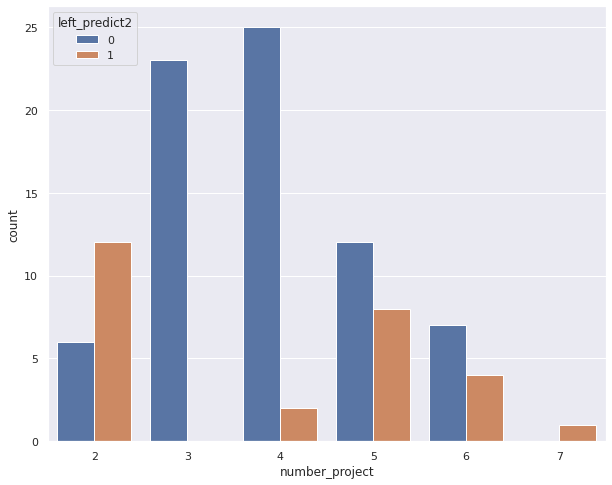

In [20]:
sns.countplot(x="number_project", hue="left_predict2", data=predict );

**Final Observation and Suggestion**

The reason that I include regression model result is to show percentage that an employee is going to leave where classification model is just showing leave or stay result.

1. Based on the prediction most of people with 2 projects per year are going to leave, this may show that they may wants more challenges.
2. Three or four projects per year has the less attrition rate
3. Managers with the staff left_predict_percent = 33.33% (or greater) can have 1:1 conversation with their staff to review their workload and to understand what excites them(if they want to retain their staff)







In [21]:
# Saving results to csv file
predict.to_csv("final_predictions.csv")